In [1]:
from utils import readDatabase, evaluate_AUC_Distance, evaluate_AUC_Prob
from models import EuclideanModel, ManhattanModel, CosineModel, SVMModel, RFModel
from sklearn.metrics import roc_curve, roc_auc_score, accuracy_score, recall_score ,f1_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt

path = "./data/grey/keystroke.db"
train_users, dev_users, test_users = readDatabase(path)

fpr_ = dict()
tpr_ = dict()
roc_auc_ = dict()
thresh_x_ = dict()
thresh_y_ = dict()

In [2]:
#------------------------------------------------------------------
#RFModel 1

y_test_test, y_pred_test, genuine_scores_test, impostor_scores_test, thresh_std, thresh_x, thresh_y = RFModel(train_users, dev_users, test_users)

report = classification_report(y_test_test, y_pred_test, labels = [ "genuine", "impostor"])
cm = confusion_matrix(y_test_test, y_pred_test, labels = [ "genuine", "impostor"])
accuracy = accuracy_score(y_test_test, y_pred_test)
recall = recall_score(y_test_test, y_pred_test, pos_label  = "genuine")
f1 = f1_score(y_test_test, y_pred_test, pos_label  = "genuine")
print("\n-------------------------------------")
print("Distancia Random Forest")
print("Accuracy", accuracy)
print("Recall", recall)
print("F1", f1)
print(report)
print(cm)
  
labels = [1] * len(genuine_scores_test) + [0] * len(impostor_scores_test)
fpr, tpr, thresholds = roc_curve(labels, genuine_scores_test + impostor_scores_test, pos_label = 1)
roc_auc = evaluate_AUC_Prob(genuine_scores_test, impostor_scores_test)
fpr_["rf"] = fpr
tpr_["rf"] = tpr
roc_auc_["rf"] = roc_auc
thresh_x_["rf"] = thresh_x
thresh_y_["rf"] = thresh_y


-------------------------------------
Distancia Random Forest
Accuracy 0.9564832326214309
Recall 0.9607361963190184
F1 0.24924399172369888
              precision    recall  f1-score   support

     genuine       0.14      0.96      0.25       815
    impostor       1.00      0.96      0.98    107580

    accuracy                           0.96    108395
   macro avg       0.57      0.96      0.61    108395
weighted avg       0.99      0.96      0.97    108395

[[   783     32]
 [  4685 102895]]


In [3]:
#------------------------------------------------------------------
#SVM 2

y_test_test, y_pred_test, genuine_scores_test, impostor_scores_test, thresh_std, thresh_x, thresh_y = SVMModel(train_users, dev_users, test_users)

report = classification_report(y_test_test, y_pred_test, labels = [ "genuine", "impostor"])
cm = confusion_matrix(y_test_test, y_pred_test, labels = [ "genuine", "impostor"])
accuracy = accuracy_score(y_test_test, y_pred_test)
recall = recall_score(y_test_test, y_pred_test, pos_label  = "genuine")
f1 = f1_score(y_test_test, y_pred_test, pos_label  = "genuine")
print("\n-------------------------------------")
print("Distancia SVM")
print("Accuracy", accuracy)
print("Recall", recall)
print("F1", f1)
print(report)
print(cm)
  
labels = [1] * len(genuine_scores_test) + [0] * len(impostor_scores_test)
fpr, tpr, thresholds = roc_curve(labels, genuine_scores_test + impostor_scores_test, pos_label = 1)
roc_auc = evaluate_AUC_Prob(genuine_scores_test, impostor_scores_test)
fpr_["svm"] = fpr
tpr_["svm"] = tpr
roc_auc_["svm"] = roc_auc
thresh_x_["svm"] = thresh_x
thresh_y_["svm"] = thresh_y


-------------------------------------
Distancia SVM
Accuracy 0.9185663545366484
Recall 0.9276073619631902
F1 0.14624238320920785
              precision    recall  f1-score   support

     genuine       0.08      0.93      0.15       815
    impostor       1.00      0.92      0.96    107580

    accuracy                           0.92    108395
   macro avg       0.54      0.92      0.55    108395
weighted avg       0.99      0.92      0.95    108395

[[  756    59]
 [ 8768 98812]]


In [4]:
#------------------------------------------------------------------
#Distancia Manhattan 3 

y_test_test, y_pred_test, genuine_scores_test, impostor_scores_test, thresh_std, thresh_x, thresh_y = ManhattanModel(train_users, dev_users, test_users)

report = classification_report(y_test_test, y_pred_test, labels = [ "genuine", "impostor"])
cm = confusion_matrix(y_test_test, y_pred_test, labels = [ "genuine", "impostor"])
accuracy = accuracy_score(y_test_test, y_pred_test)
recall = recall_score(y_test_test, y_pred_test, pos_label  = "genuine")
f1 = f1_score(y_test_test, y_pred_test, pos_label  = "genuine")
print("\n-------------------------------------")
print("Distancia Manhattan")
print("Accuracy", accuracy)
print("Recall", recall)
print("F1", f1)
print(report)
print(cm)
  
labels = [0] * len(genuine_scores_test) + [1] * len(impostor_scores_test)
fpr, tpr, thresholds = roc_curve(labels, genuine_scores_test + impostor_scores_test)
roc_auc = evaluate_AUC_Distance(genuine_scores_test, impostor_scores_test)
fpr_["manhattan"] = fpr
tpr_["manhattan"] = tpr
roc_auc_["manhattan"] = roc_auc
thresh_x_["manhattan"] = thresh_x
thresh_y_["manhattan"] = thresh_y


-------------------------------------
Distancia Manhattan
Accuracy 0.7861155957378108
Recall 0.8
F1 0.053250571708591966
              precision    recall  f1-score   support

     genuine       0.03      0.80      0.05       815
    impostor       1.00      0.79      0.88    107580

    accuracy                           0.79    108395
   macro avg       0.51      0.79      0.47    108395
weighted avg       0.99      0.79      0.87    108395

[[  652   163]
 [23021 84559]]


In [5]:
#------------------------------------------------------------------
#Distancia Coseno 4

y_test_test, y_pred_test, genuine_scores_test, impostor_scores_test, thresh_std, thresh_x, thresh_y = CosineModel(train_users, dev_users, test_users)

report = classification_report(y_test_test, y_pred_test, labels = [ "genuine", "impostor"])
cm = confusion_matrix(y_test_test, y_pred_test, labels = [ "genuine", "impostor"])
accuracy = accuracy_score(y_test_test, y_pred_test)
recall = recall_score(y_test_test, y_pred_test, pos_label  = "genuine")
f1 = f1_score(y_test_test, y_pred_test, pos_label  = "genuine")
print("\n-------------------------------------")
print("Distancia Coseno")
print("Accuracy", accuracy)
print("Recall", recall)
print("F1", f1)
print(report)
print(cm)
  
labels = [0] * len(genuine_scores_test) + [1] * len(impostor_scores_test)
fpr, tpr, thresholds = roc_curve(labels, genuine_scores_test + impostor_scores_test)
roc_auc = evaluate_AUC_Distance(genuine_scores_test, impostor_scores_test)
fpr_["cos"] = fpr
tpr_["cos"] = tpr
roc_auc_["cos"] = roc_auc
thresh_x_["cos"] = thresh_x
thresh_y_["cos"] = thresh_y


-------------------------------------
Distancia Coseno
Accuracy 0.7887264172701692
Recall 0.7619631901840491
F1 0.051443482582943297
              precision    recall  f1-score   support

     genuine       0.03      0.76      0.05       815
    impostor       1.00      0.79      0.88    107580

    accuracy                           0.79    108395
   macro avg       0.51      0.78      0.47    108395
weighted avg       0.99      0.79      0.87    108395

[[  621   194]
 [22707 84873]]


In [6]:
#------------------------------------------------------------------
#Distancia Euclidiana 5
y_test_test, y_pred_test, genuine_scores_test, impostor_scores_test, thresh_std, thresh_x, thresh_y = EuclideanModel(train_users, dev_users, test_users)

report = classification_report(y_test_test, y_pred_test, labels = [ "genuine", "impostor"])
cm = confusion_matrix(y_test_test, y_pred_test, labels = [ "genuine", "impostor"])
accuracy = accuracy_score(y_test_test, y_pred_test)
recall = recall_score(y_test_test, y_pred_test, pos_label  = "genuine")
f1 = f1_score(y_test_test, y_pred_test, pos_label  = "genuine")
print("\n-------------------------------------")
print("Distancia Euclidiana")
print("Accuracy", accuracy)
print("Recall", recall)
print("F1", f1)
print(report)
print(cm)

labels = [0] * len(genuine_scores_test) + [1] * len(impostor_scores_test)
fpr, tpr, thresholds = roc_curve(labels, genuine_scores_test + impostor_scores_test)
roc_auc = evaluate_AUC_Distance(genuine_scores_test, impostor_scores_test)
fpr_["eu"] = fpr
tpr_["eu"] = tpr
roc_auc_["eu"] = roc_auc
thresh_x_["eu"] = thresh_x
thresh_y_["eu"] = thresh_y


-------------------------------------
Distancia Euclidiana
Accuracy 0.7456247981917985
Recall 0.7398773006134969
F1 0.04190555613468154
              precision    recall  f1-score   support

     genuine       0.02      0.74      0.04       815
    impostor       1.00      0.75      0.85    107580

    accuracy                           0.75    108395
   macro avg       0.51      0.74      0.45    108395
weighted avg       0.99      0.75      0.85    108395

[[  603   212]
 [27361 80219]]


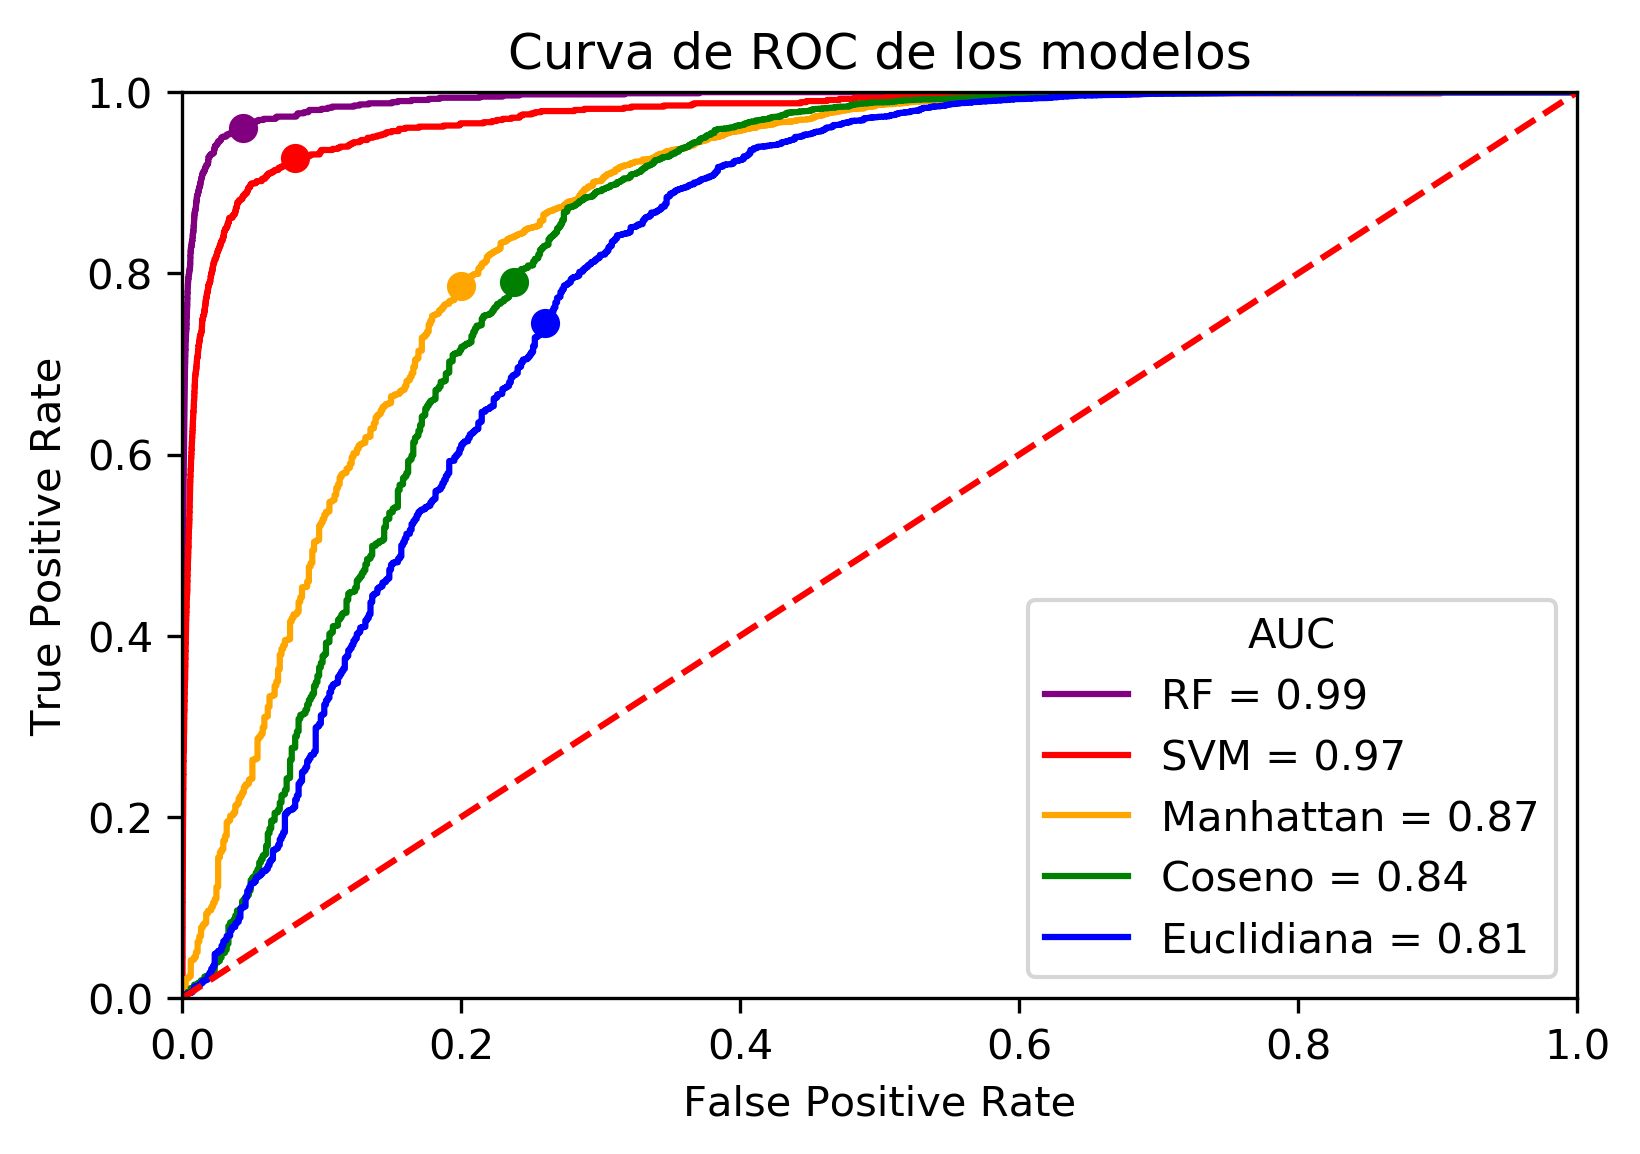

In [7]:
plt.figure( dpi=300)

plt.title("Curva de ROC de los modelos")

plt.plot(fpr_["rf"], tpr_["rf"], 'purple', label = 'RF = %0.2f' % roc_auc_["rf"])
plt.scatter(thresh_x_["rf"] ,thresh_y_["rf"], color = "purple")
#plt.text(thresh_x_["rf"] + 0.025, thresh_y_["rf"] - 0.05 , thresh_std)


plt.plot(fpr_["svm"], tpr_["svm"], 'red', label = 'SVM = %0.2f' % roc_auc_["svm"])
plt.scatter(thresh_x_["svm"] ,thresh_y_["svm"], color = "red" )
#plt.text(thresh_x_["svm"]+ 0.025, thresh_y_["svm"] - 0.05 , thresh_std)

plt.plot(fpr_["manhattan"], tpr_["manhattan"], 'orange', label = 'Manhattan = %0.2f' % roc_auc_["manhattan"])
plt.scatter(thresh_x_["manhattan"] ,thresh_y_["manhattan"], color = "orange")
#plt.text(thresh_x_["manhattan"] + 0.025,thresh_y_["manhattan"] - 0.05 , thresh_std)

plt.plot(fpr_["cos"], tpr_["cos"], 'green', label = 'Coseno = %0.2f' % roc_auc_["cos"])
plt.scatter(thresh_x_["cos"] ,thresh_y_["cos"], color = "green")
#plt.text(thresh_x_["cos"] + 0.025, thresh_y_["cos"] - 0.05 , thresh_std)

plt.plot(fpr_["eu"], tpr_["eu"], 'blue', label = 'Euclidiana = %0.2f' % roc_auc_["eu"])
plt.scatter(thresh_x_["eu"] ,thresh_y_["eu"], color = "blue")
#plt.text(thresh_x_["eu"]+ 0.025, thresh_y_["eu"] - 0.05 , thresh_std)

#------------------------------------------------------------------
#Configuraciones generales
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(title='AUC', loc = 'lower right')
plt.show()

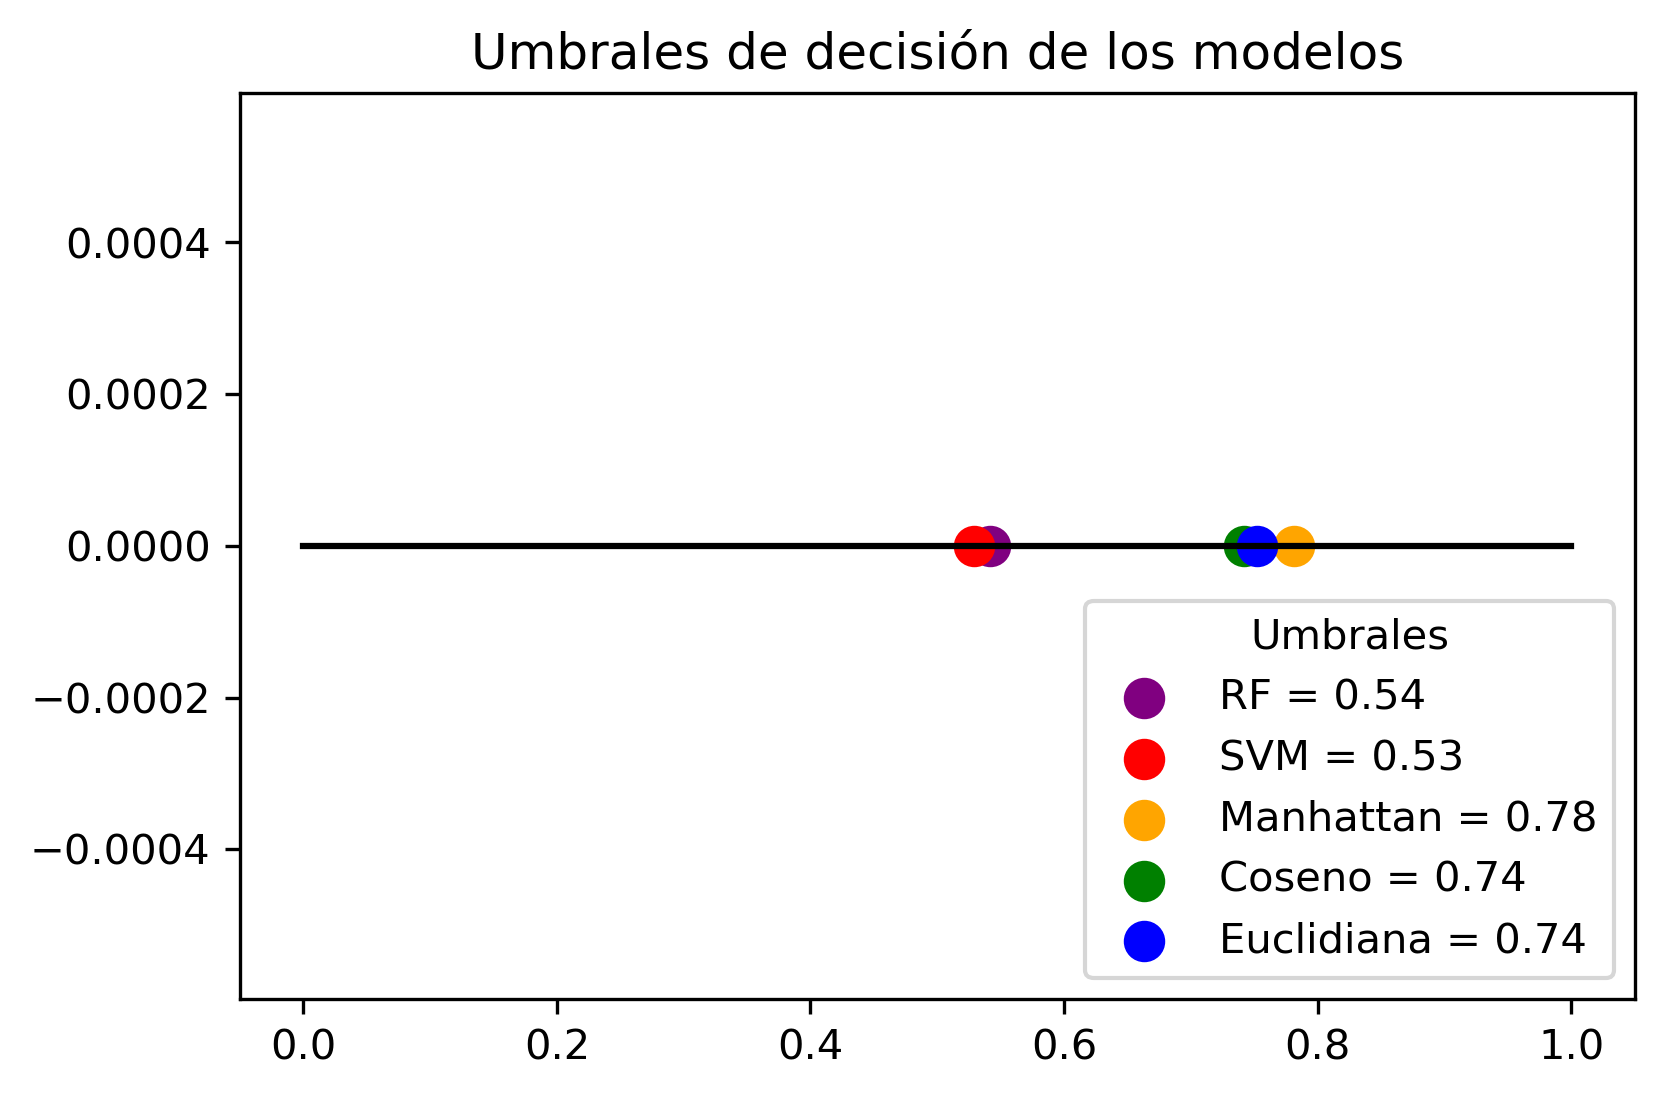

In [8]:
plt.figure( dpi=300)
#-----------------------------------------------------------------
#Rango

size =  80

plt.title("Umbrales de decisión de los modelos")
plt.plot([0, 1], [0,0], color = "black")

plt.scatter(0.54190476, 0, color = "purple", label = "RF = " + str(0.54),  s= size)
plt.scatter(0.52927178, 0, color = "red", label = "SVM = " + str(0.53),  s= size)
plt.scatter(0.781604317441693, 0, color = "orange", label = "Manhattan = " + str(0.78),  s= size)
plt.scatter(0.7420176032699239, 0, color = "green", label = "Coseno = " + str(0.74),  s= size)
plt.scatter(0.752036070422859, 0, color = "blue", label = "Euclidiana = " + str(0.74),  s= size)

plt.legend(title='Umbrales')
plt.legend(loc = 'lower right', title = "Umbrales")
plt.show()